In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import image
import matplotlib.pyplot as plt

In [2]:
#Checking format of tensorflow dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

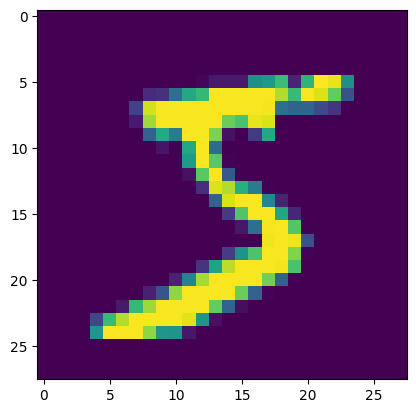

In [3]:
x_train
plt.imshow(x_train[0])

In [4]:
#Testing on single image
new_img = image.imread("/content/4561.png")
new_img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

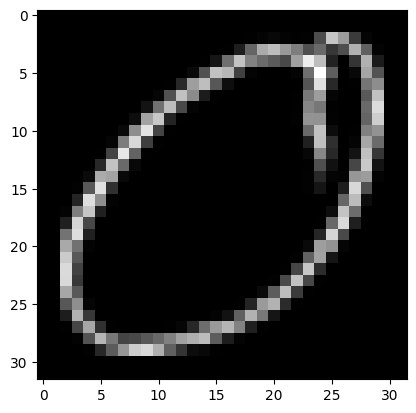

In [5]:
plt.imshow(new_img,cmap='gray')

In [6]:
!pip install kaggle
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d anurags397/hindi-mnist-data

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mv: cannot stat './kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.9/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.9/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [7]:
!unzip -q /content/hindi-mnist-data.zip -d /content/Dataset

replace /content/Dataset/DevanagariHandwrittenDigitDataset/Test/digit_0/103277.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [8]:
# Creating numpy arrays from kaggle dataset
import os

In [9]:
# Checking loop through all images
count1=0
count2=0
for i in range(9):
    directory1=f"/content/Dataset/DevanagariHandwrittenDigitDataset/Train/digit_{i}"
    directory2=f"/content/Dataset/DevanagariHandwrittenDigitDataset/Test/digit_{i}"
    for filename in os.listdir(directory1):
        f = os.path.join(directory1, filename)
        # checking if it is a file
        if os.path.isfile(f):
            count1=count1+1
    for filename in os.listdir(directory2):
        f = os.path.join(directory2, filename)
        # checking if it is a file
        if os.path.isfile(f):
            count2=count2+1
    
print(count1)
print(count2)

15300
2700


In [10]:
#Defining numpy array for 15,300 images each 32x32 pixel size

X_train=np.zeros((15300,32,32))
X_test=np.zeros((2700,32,32))
Y_train=np.zeros((15300,))
Y_test=np.zeros((2700,))

In [11]:
#Reading images
index_train=0
index_test=0
for i in range(9):
    directory_train=f"/content/Dataset/DevanagariHandwrittenDigitDataset/Train/digit_{i}"
    directory_test=f"/content/Dataset/DevanagariHandwrittenDigitDataset/Test/digit_{i}"
    for filename in os.listdir(directory_train):
        f = os.path.join(directory_train, filename)
        # checking if it is a file
        if os.path.isfile(f):
            img= image.imread(f)
            X_train[index_train]=img
            Y_train[index_train]=i
            index_train=index_train+1
    for filename in os.listdir(directory_test):
        f = os.path.join(directory_test, filename)
        # checking if it is a file
        if os.path.isfile(f):
            img= image.imread(f)
            X_test[index_test]=img
            Y_test[index_test]=i
            index_test=index_test+1

6.0

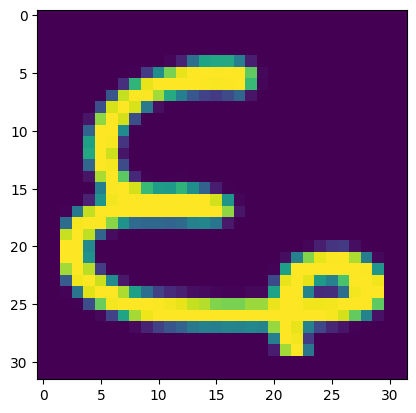

In [12]:
#Testing if data is read correctly

plt.imshow(X_test[2000])
Y_test[2000]

In [13]:
print(X_train[10])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
print(X_train[10].shape)

(32, 32)


In [15]:
# setting up layers for Neural Network
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32)),
    keras.layers.Dense(50, activation = 'relu'),    # Number of neurons = 50
    keras.layers.Dense(30, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')   # output layer, number of neurons = number of classes of classiying classes(0-9)
])

In [16]:
# compiling the model

model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# labels 0-9 integers but if we had outputs as One Hot Encoder[0-1] then we had to use loss= 'categorical_crossentropy'

In [17]:
# training the neural network we have
model.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
479/479 [==============================] - 2s 3ms/step - loss: 0.3496 - accuracy: 0.8968
Epoch 2/10
479/479 [==============================] - 1s 3ms/step - loss: 0.1099 - accuracy: 0.9675
Epoch 3/10
479/479 [==============================] - 2s 3ms/step - loss: 0.0704 - accuracy: 0.9808
Epoch 4/10
479/479 [==============================] - 3s 7ms/step - loss: 0.0501 - accuracy: 0.9851
Epoch 5/10
479/479 [==============================] - 3s 6ms/step - loss: 0.0353 - accuracy: 0.9898
Epoch 6/10
479/479 [==============================] - 2s 4ms/step - loss: 0.0318 - accuracy: 0.9908
Epoch 7/10
479/479 [==============================] - 2s 5ms/step - loss: 0.0330 - accuracy: 0.9897
Epoch 8/10
479/479 [==============================] - 2s 5ms/step - loss: 0.0186 - accuracy: 0.9944
Epoch 9/10
479/479 [==============================] - 3s 5ms/step - loss: 0.0124 - accuracy: 0.9970
Epoch 10/10
479/479 [==============================] - 4s 7ms/step - loss: 0.0111 - accuracy: 0.9973

In [18]:
loss, accuracy = model.evaluate(X_test, Y_test)

85/85 [==============================] - 1s 6ms/step - loss: 0.0841 - accuracy: 0.9767


8.0

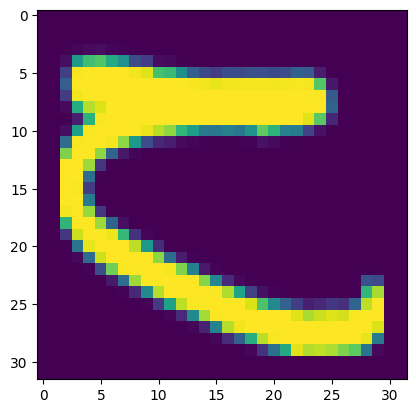

In [19]:
# Display first data point in X_test
plt.imshow(X_test[2500])
Y_test[2500]

In [20]:
y_pred = model.predict(X_test)
# it gives prediction probability of particular data entry for each class

85/85 [==============================] - 0s 3ms/step


In [21]:
print(y_pred.shape)

(2700, 10)


In [22]:
print(y_pred[2500])

[9.9905020e-01 9.9916363e-01 9.9808633e-01 3.7705749e-07 5.6500360e-03
 5.3462372e-03 9.3967479e-04 1.9028381e-03 1.0000000e+00 8.5486990e-14]


Here the 9th value 1.0000000e+00 is the highest probability which is of the label '8'

In [23]:
# converting prediction probabilities to class label
label_for_first_image = np.argmax(y_pred[0])
label_for_first_image

0

In [24]:
# converting prediction probabilties to class label for all test data points
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 7,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [25]:
print(y_pred)

[[1.0000000e+00 6.9388417e-03 4.5382127e-01 ... 2.5441751e-01
  6.6570336e-01 2.7884470e-10]
 [1.0000000e+00 6.4406586e-01 7.8793159e-03 ... 9.2213374e-01
  1.9251415e-01 8.6582226e-09]
 [9.9999988e-01 8.5987788e-01 9.7378686e-02 ... 6.4345306e-01
  6.1780465e-01 1.8102914e-07]
 ...
 [6.8841380e-01 7.9791546e-01 2.4578233e-01 ... 2.4967426e-02
  1.0000000e+00 6.3631225e-11]
 [9.9635750e-01 7.5214660e-01 6.4264029e-02 ... 3.4608977e-04
  1.0000000e+00 9.4187345e-11]
 [9.9794388e-01 3.1560183e-01 1.7880045e-01 ... 4.0580640e-03
  1.0000000e+00 6.2520036e-13]]


y_test -----> True Label 

y_pred_labels ----> Predicted Labels


In [26]:
# confusion matrix(true values, predicted values)
from tensorflow.math import confusion_matrix
conf_mat = confusion_matrix(Y_test, y_pred_labels)
conf_mat

<tf.Tensor: shape=(9, 9), dtype=int32, numpy=
array([[299,   0,   0,   0,   0,   0,   0,   1,   0],
       [  0, 298,   0,   0,   0,   0,   1,   1,   0],
       [  0,   3, 287,   8,   1,   1,   0,   0,   0],
       [  0,   0,  23, 272,   0,   3,   1,   1,   0],
       [  0,   0,   0,   1, 285,   9,   5,   0,   0],
       [  0,   0,   3,   1,   1, 293,   2,   0,   0],
       [  0,   2,   0,   0,   0,   0, 297,   0,   1],
       [  2,   0,   0,   0,   1,   3,   4, 290,   0],
       [  0,   0,   0,   1,   0,   1,   0,   0, 298]], dtype=int32)>

Text(0.5, 47.7222222222222, 'Predicted Labels')

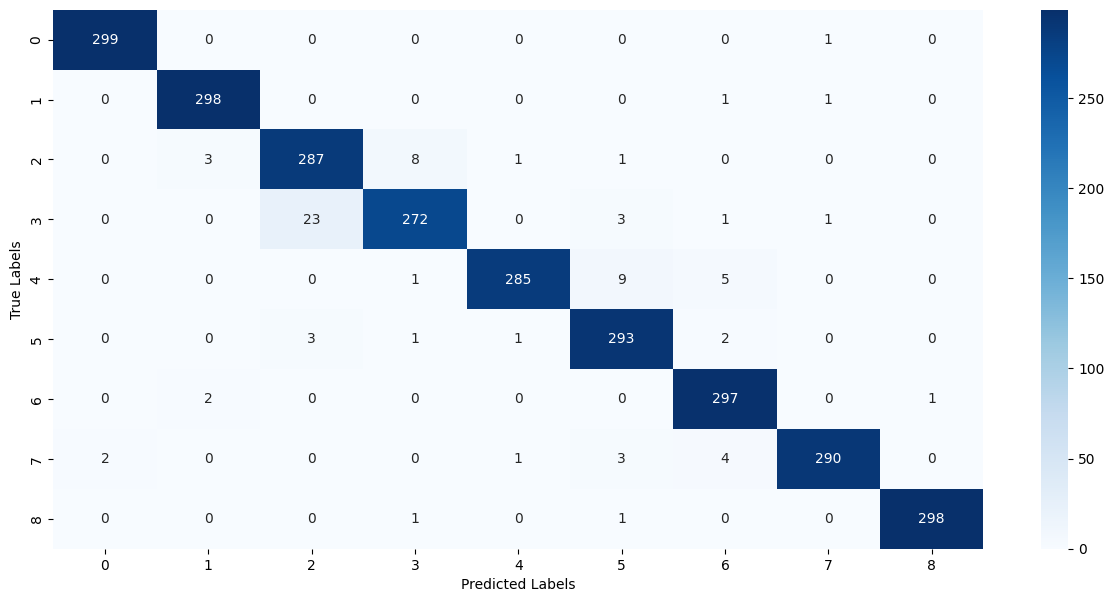

In [27]:
import seaborn as sns
plt.figure(figsize = (15,7))
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = 'Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [28]:
# Building Predictive System
import cv2
from google.colab.patches import cv2_imshow
input_image_path = '/content/Dataset/DevanagariHandwrittenDigitDataset/Train/digit_9/10402.png'
input_image = cv2.imread(input_image_path)

In [29]:
type(input_image)

numpy.ndarray

In [30]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


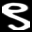

In [31]:
cv2_imshow(input_image)

In [32]:
input_image.shape

(32, 32, 3)

In [33]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
input_image_resize = cv2.resize(grayscale,(32,32))

In [34]:
input_image_resize.shape

(32, 32)

In [35]:
input_image_resize = input_image_resize/255     # converting individual image detail to 0-1
image_reshaped= np.reshape(input_image_resize, [1,32,32])     # notifying model that 1 data of size (28,28) is provided

In [36]:
input_pred = model.predict(image_reshaped)
input_pred

1/1 [==============================] - 0s 134ms/step


array([[9.7368315e-02, 9.8917735e-01, 7.9273590e-04, 4.9363767e-05,
        9.9985039e-01, 5.6952890e-04, 8.5518241e-01, 7.2329596e-02,
        9.9999893e-01, 2.6357866e-10]], dtype=float32)

In [37]:
input_pred_label = np.argmax(input_pred)
input_pred_label

8

MAIN PREDICTIVE SYSTEM

Path of Image to predict:/content/Dataset/DevanagariHandwrittenDigitDataset/Test/digit_1/12430.png


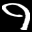

1/1 [==============================] - 0s 22ms/step
The Handwritten Digit is recognized as : 1


In [41]:
input_image_path = input("Path of Image to predict:")
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
input_image_resize = cv2.resize(grayscale,(32,32))
input_image_resize = input_image_resize/255  
image_reshaped= np.reshape(input_image_resize, [1,32,32]) 
input_pred = model.predict(image_reshaped)
input_pred_label = np.argmax(input_pred)
print("The Handwritten Digit is recognized as :", input_pred_label)